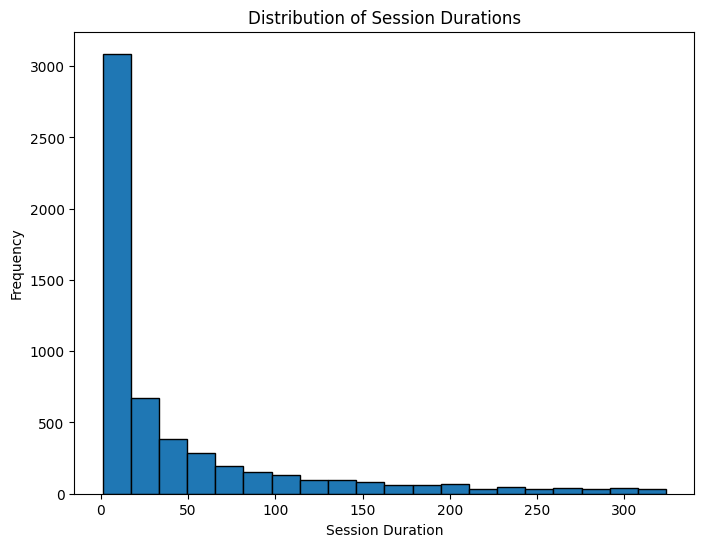

/var/folders/6z/bh7_dtkj0c7dqhfn_nwgx23r0000gn/T/ipykernel_68310/3839578185.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


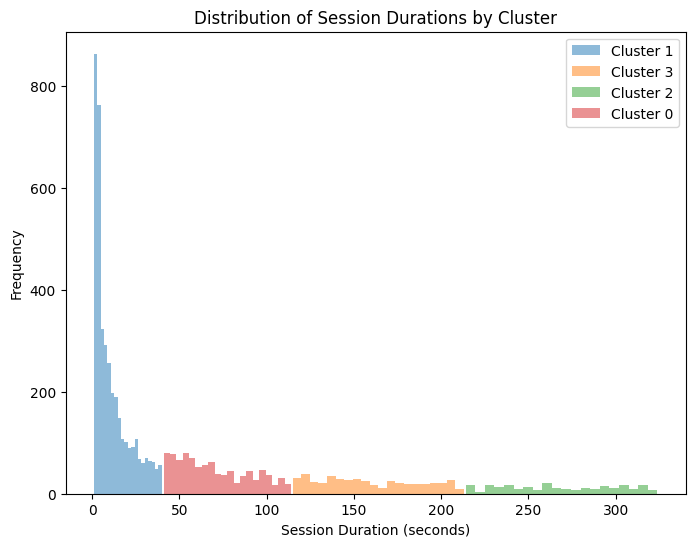

Cluster Centers:
Cluster 0: 69.78 seconds
Cluster 1: 10.70 seconds
Cluster 2: 267.34 seconds
Cluster 3: 158.93 seconds


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data = pd.read_excel('session.xlsx', parse_dates=['SESSION_END', 'SESSION_START'])

# Remove sessions with a duration of 0 seconds
data = data[data['SESSION_DURATION'] > 0]

# Remove outliers using the IQR method
Q1 = data['SESSION_DURATION'].quantile(0.25)
Q3 = data['SESSION_DURATION'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['SESSION_DURATION'] >= lower_bound) & (data['SESSION_DURATION'] <= upper_bound)]

df = data_filtered

# Plot a histogram of session durations
plt.figure(figsize=(8, 6))
plt.hist(df['SESSION_DURATION'], bins=20, edgecolor='black')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Session Durations')
plt.show()

# Perform clustering analysis
X = df['SESSION_DURATION'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Plot the distribution of session durations with cluster information
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.hist(cluster_data['SESSION_DURATION'], bins=20, alpha=0.5, label=f'Cluster {cluster}')

plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Durations by Cluster')
plt.legend()
plt.show()

# Print the cluster centers
print("Cluster Centers:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {center[0]:.2f} seconds")